In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv
from pathlib import Path
import json

In [2]:
path = Path.cwd() / "rmn_zmn_coefficients"

with open(path / "rmn_data.json", "r") as file:
    Rmn_cos = json.load(file)
    Rmn_cos_num_pol = Rmn_cos.get("poloidal_mode_numbers")
    Rmn_cos_num_tor = Rmn_cos.get("toroidal_mode_numbers")
    Rmn_cos_num_rad = Rmn_cos.get("radial_points_number")
    Rmn_cos_coef = Rmn_cos.get("rmncos_coefficients")

with open(path / "zmn_data.json", "r") as file:
    Zmn_sin = json.load(file)
    Zmn_sin_num_pol = Zmn_sin.get("poloidal_mode_numbers")
    Zmn_sin_num_tor = Zmn_sin.get("toroidal_mode_numbers")
    Zmn_sin_num_rad = Zmn_sin.get("radial_points_number")
    Zmn_sin_coef = Zmn_sin.get("rmncos_coefficients")

num_pol = len(Zmn_sin_num_pol)
num_tor = len(Zmn_sin_num_tor)
num_rad = Zmn_sin_num_rad

Zmn_coeffs = np.ndarray(shape=(num_pol, num_tor, num_rad), dtype="double")
Rmn_coeffs = np.ndarray(shape=(num_pol, num_tor, num_rad), dtype="double")

index = 0
for p in range(num_pol):
    for t in range(num_tor):
        for r in range(num_rad):
            Zmn_coeffs[p][t][r] = Zmn_sin_coef[index]
            Rmn_coeffs[p][t][r] = Rmn_cos_coef[index]
            index += 1

In [3]:
theta = np.linspace(0, 2 * np.pi, 50)
phi = np.linspace(0, 2 * np.pi, 40)
theta, phi = np.meshgrid(theta, phi)

In [4]:
num_pol, num_tor, num_rad

(12, 25, 99)

In [5]:
r = 0
z = 0
Np = 5
for pol_idx, m in enumerate(Rmn_cos_num_pol):
    for tor_idx, n in enumerate(Rmn_cos_num_tor):
        for rad_idx in range(num_rad):
            angle = m * theta - n * Np * phi 
            r += Rmn_coeffs[pol_idx][tor_idx][-1] * np.cos(angle)
            z += Zmn_coeffs[pol_idx][tor_idx][-1] * np.sin(angle)
x,y = r* np.cos(phi), r* np.sin(phi)

In [6]:
%matplotlib
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, cmap="viridis")
ax.plot_surface(x,y,z, cmap="viridis")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_xlim3d(-600,600)
ax.set_ylim3d(-600,600)
ax.set_zlim3d(-600,600)
plt.show()

Using matplotlib backend: <object object at 0x7cfa0b1af0a0>


/tmp/ipykernel_17413/2223082325.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x,y,z, cmap="viridis")


/home/tomasz/Desktop/permeability/.permeability_venv/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/tomasz/Desktop/permeability/.permeability_venv/lib/python3.11/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


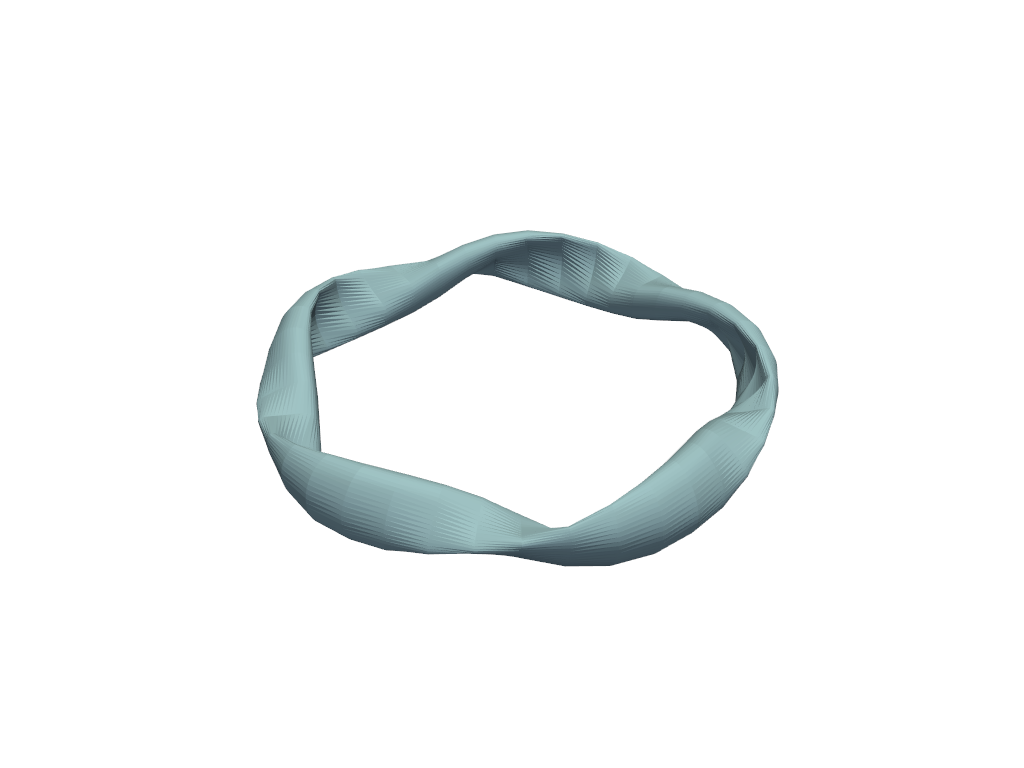

In [7]:
grid = pv.StructuredGrid(x, y, z)
fig = pv.Plotter()
fig.add_mesh(grid, cmap="viridis")
fig.show()